# Unsupervised Learning Model 

Machine Learning, A2_Unsupervised_Analysis_Project - Tommaso Gagliardi

Shaping a marketing strategy presumes the identification of the type of client.

After having charged to focus the ideal type of person for our enterprise we conduced an analysis based on the survey presented to our team. Considering separately psychometric, behavioral and demographic questions we extracted a spectrum which describes our possible clients. Then we analyzed these personas to identify them in terms of age and salary.

The following model presents type of personas principally characterized by their approach to technology.

In [1]:
# Finding the directory where file is stored
cd ~

C:\Users\Tommaso


In [2]:
cd ./Desktop/Hult documents/Machine Learning

C:\Users\Tommaso\Desktop\Hult documents\Machine Learning


In [3]:
cd ./Sessions Unsupervised Learning/Group assignment

C:\Users\Tommaso\Desktop\Hult documents\Machine Learning\Sessions Unsupervised Learning\Group assignment


In [4]:
# Import principal packages for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys # in case of errors phase of analysis

from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA # Principal Component Analysis

from scipy.cluster.hierarchy import dendrogram, linkage # visualisation dendrogram
from sklearn.cluster         import KMeans # clusters

import os
from os import listdir

In [5]:
for data in listdir(path = '.'):
    print(data)

.ipynb_checkpoints
A2_Unsupervised_Analysis_Proejct - Gagliardi, Castellanos(provisory).ipynb
App_2_survey (functions version).ipynb
App_survey (not valid).ipynb
App_survey_modified.xlsx
Mobile App Research Survey (1).pdf
Mobile App Research Survey.pdf
Mobile_App_Survey_Data.xlsx
Team_3_A2_Analysis (1).ipynb
Team_3_A2_Analysis.ipynb


# Initialisation of analysis

In [6]:
# Opening of dataset
data = './Mobile_App_Survey_Data.xlsx'

app = pd.read_excel(io = data)
app

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,...,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,1,10,0,0,1,0,0,0,0,0,...,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,...,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,...,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,...,2,1,0,0,0,0,3,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,2392,2,1,1,0,0,0,0,0,0,...,2,0,1,0,0,0,6,1,1,1
1548,2393,4,1,1,0,0,0,0,0,1,...,1,0,1,1,0,0,1,2,9,2
1549,2394,3,1,1,0,1,0,0,0,1,...,2,0,0,1,1,0,1,2,12,2
1550,2395,2,1,0,1,0,0,0,0,0,...,2,1,0,0,0,0,6,1,7,1


In [7]:
# Showing the information of the dataset
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 88 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   caseID  1552 non-null   int64
 1   q1      1552 non-null   int64
 2   q2r1    1552 non-null   int64
 3   q2r2    1552 non-null   int64
 4   q2r3    1552 non-null   int64
 5   q2r4    1552 non-null   int64
 6   q2r5    1552 non-null   int64
 7   q2r6    1552 non-null   int64
 8   q2r7    1552 non-null   int64
 9   q2r8    1552 non-null   int64
 10  q2r9    1552 non-null   int64
 11  q2r10   1552 non-null   int64
 12  q4r1    1552 non-null   int64
 13  q4r2    1552 non-null   int64
 14  q4r3    1552 non-null   int64
 15  q4r4    1552 non-null   int64
 16  q4r5    1552 non-null   int64
 17  q4r6    1552 non-null   int64
 18  q4r7    1552 non-null   int64
 19  q4r8    1552 non-null   int64
 20  q4r9    1552 non-null   int64
 21  q4r10   1552 non-null   int64
 22  q4r11   1552 non-null   int64
 23  q11     1552 

In [8]:
# Function for checking the missing values
def missing_values():
    
    m_values = app.isnull().sum().sum()
    
    return m_values

missing_values()

0

In [9]:
# Descriptive statistics dataset
app.describe().round(2)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,...,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
count,1552.00,1552.00,1552.0,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,...,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00
mean,1192.85,4.51,0.5,0.24,0.36,0.2,0.06,0.09,0.04,0.19,...,1.90,0.5,0.19,0.18,0.15,0.16,1.73,1.85,7.80,1.53
std,712.01,2.40,0.5,0.43,0.48,0.4,0.23,0.28,0.20,0.40,...,0.93,0.5,0.39,0.39,0.35,0.37,1.49,0.36,3.72,0.50
min,1.00,1.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,1.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,570.75,2.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,1.00,0.0,0.00,0.00,0.00,0.00,1.00,2.00,5.00,1.00
50%,1144.50,4.00,1.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,2.00,1.0,0.00,0.00,0.00,0.00,1.00,2.00,7.50,2.00
75%,1833.50,6.00,1.0,0.00,1.00,0.0,0.00,0.00,0.00,0.00,...,2.00,1.0,0.00,0.00,0.00,0.00,2.00,2.00,11.00,2.00
max,2396.00,11.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,...,4.00,1.0,1.00,1.00,1.00,1.00,6.00,2.00,14.00,2.00


The presence of different type of variables in the dataset made necessary an initial division of the questions.

The first passage consisted in the drop of demographic variables, due to the presence of psychometric and behavioral questions. To avoid conflicts between them in the analysis, demographic information were dropped immediately.
In a second passage the three psychometric questions were standardized separately and then recomposed in a unique dataframe.

In [10]:
# Dropping demographic variables from dataset
demographic = ['caseID', 'q1','q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55',
              'q56', 'q57']

app_princ = app.drop(demographic,
                    axis = 1)

To control extreme answers given in the survey it has been followed a process of double transposition and scaling. Consequently, psychometric variables were transposed and scaled a first time. Then, the same process was repeated.

This passage was necessary to standardize the analysis to provide to the marketing sector. Otherwise, extreme results would have influenced the results.

In [11]:
# Function for process of transposition 
def transpose(df):
    
    df_transposed = df.transpose()
    df_transposed = pd.DataFrame(df_transposed)
        
    return df_transposed

In [12]:
# Function for process of scaling
def scaler(df):
    
    scaler = StandardScaler()
    
    scaler.fit(df)
    df_scaled = scaler.transform(df)
    
    new_df = pd.DataFrame(df_scaled)
    
    return new_df

In [13]:
# Single dataframe for psychometric 24
app_24 = app_princ.loc[:, ['q24r1', 'q24r2', 'q24r3', 'q24r4',
       'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11',
       'q24r12']]

app_24 = pd.DataFrame(app_24)
app_24.head(n = 5)

,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12
0,5,3,3,5,5,4,5,3,4,3,3,3
1,1,1,2,1,1,1,1,1,1,1,2,2
2,5,3,2,3,3,3,2,3,3,4,5,3
3,2,1,1,2,1,1,1,2,2,2,2,3
4,3,3,3,2,2,3,3,2,3,3,2,2


In [14]:
# Process of transposition
app_24_transposed = transpose(df = app_24)

In [15]:
# Process of scaling
app_24_scaled = scaler(df = app_24_transposed)

In [16]:
# Process of transposition
app_24_def = transpose(df = app_24_scaled)

In [17]:
# Process of scaling
app_24_fin = scaler(df = app_24_def)

app_24_fin.columns = app_24.columns
app_24_fin

,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12
0,0.798190,-0.547136,-0.813029,0.726792,1.024959,0.878369,2.253495,-0.893079,-0.728020,-0.922480,-1.187103,-0.893417
1,-1.089142,-0.018087,2.028660,-1.049446,-0.968631,-0.120680,-0.439819,-0.384397,-1.418241,-0.420503,2.083560,2.989513
2,1.395027,0.444249,-1.265929,-0.759103,-0.642760,0.281075,-1.551962,0.060141,-1.140677,1.565028,2.282042,0.066872
3,0.028721,-0.758933,-0.963169,0.002617,-1.490807,-0.764451,-1.145272,1.226391,-0.412484,1.169052,0.611404,3.582111
4,0.341027,2.125229,1.081372,-1.622721,-1.612056,1.741793,1.601101,-1.262124,-0.131499,1.613137,-1.500261,-1.265198
...,...,...,...,...,...,...,...,...,...,...,...,...
1547,-1.376170,-0.448240,0.958479,-0.565955,-1.271819,-0.494469,1.436022,-0.797991,1.205332,1.448647,0.851828,-0.797623
1548,1.442337,-0.304136,-0.640770,0.308181,-0.595125,-0.369247,0.841768,-0.659434,0.859366,-0.691915,-0.323094,-0.658039
1549,-1.514069,2.358538,-0.889422,0.443055,0.706502,-0.674051,-1.046211,1.900736,0.008569,-1.024731,1.183629,-0.997802
1550,-0.014730,0.323063,-1.095741,-0.038277,1.060718,-0.926962,-0.114967,-0.056380,1.072128,-1.300885,0.558274,-0.050513


In [18]:
# Single dataframe for psychometric 25
app_25 = app.loc[:, ['q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7',
       'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12']]

app_25 = pd.DataFrame(app_25)
app_25.head(n = 5)

,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12
0,5,5,4,5,4,5,4,5,3,3,4,5
1,1,2,1,2,2,1,2,1,2,2,2,1
2,3,5,4,2,5,5,4,4,4,3,3,4
3,2,2,2,2,1,2,1,3,2,2,2,1
4,3,2,3,3,3,3,3,2,2,2,1,1


In [19]:
# Process of transposition
app_25_transposed = transpose(df = app_25)

In [20]:
# Process of scaling
app_25_scaled = scaler(df = app_25_transposed)

In [21]:
# Process of transposition
app_25_def = transpose(df = app_25_scaled)

In [22]:
# Process of scaling
app_25_fin = scaler(df = app_25_def)

app_25_fin.columns = app_25.columns

In [23]:
# Single dataframe for psychometric 26
app_26 = app.loc[:, ['q26r18', 'q26r3',
       'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10',
       'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']]

app_26 = pd.DataFrame(app_26)
app_26.head(n = 5)

,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17
0,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4
1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2
2,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3
3,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2
4,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1


In [24]:
# Process of transposition
app_26_transposed = transpose(df = app_26)

In [25]:
# Process of scaling
app_26_scaled = scaler(df = app_26_transposed)

In [26]:
# Process of transposition
app_26_def = transpose(df = app_26_scaled)

In [27]:
# Process of scaling
app_26_fin = scaler(df = app_26_def)

app_26_fin.columns = app_26.columns

After having normalized psychometric questions, correlations between questions were checked. This was due to understand some patterns were present in the survey, underlying the presence of unique profiles in the sample.

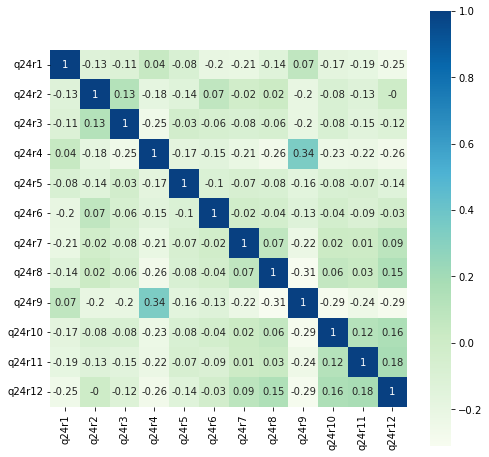

In [28]:
# Correlations for psychometric 24
fig, ax = plt.subplots(figsize = (8, 8))

app_24_corr = app_24_fin.corr(method = 'pearson').round(2)

sns.heatmap(data = app_24_corr,
           cmap = 'GnBu',
           square = True,
           annot = True)
plt.show()

In [29]:
# Feature engineering for correlation between variables
app_24_fin['no_tech'] = app_24_fin['q24r4'] + app_24_fin['q24r9']
app_24_fin['tech_link'] = app_24_fin['q24r8'] + app_24_fin['q24r10'] + app_24_fin['q24r11'] + app_24_fin['q24r12']

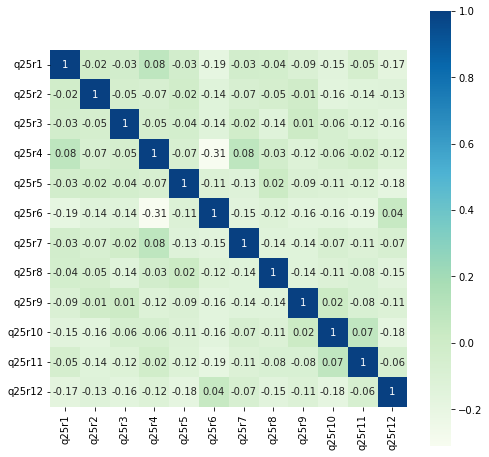

In [30]:
# Correlation for psychometric 25
fig, ax = plt.subplots(figsize = (8, 8))

app_25_corr = app_25_fin.corr(method = 'pearson').round(2)

sns.heatmap(data = app_25_corr,
           cmap = 'GnBu',
           square = True,
           annot = True)
plt.show()

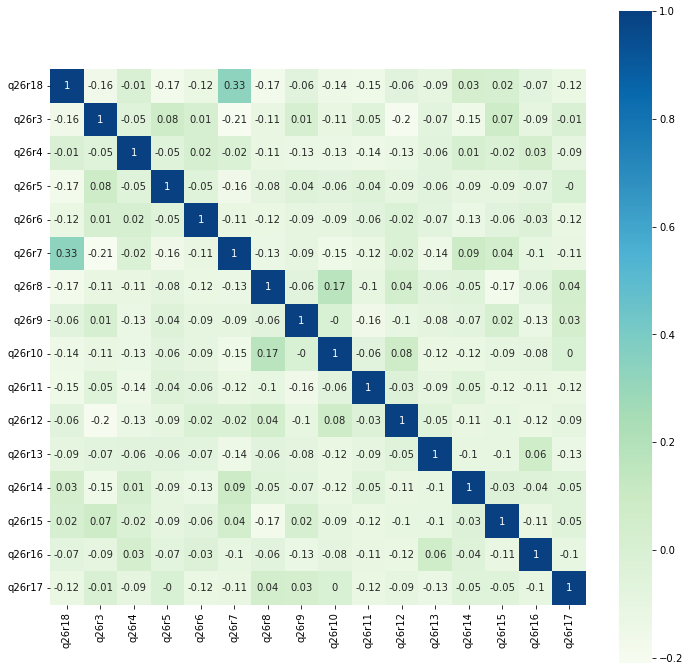

In [31]:
# Correlation for psychometric 26
fig, ax = plt.subplots(figsize = (12, 12))

app_26_corr = app_26_fin.corr(method = 'pearson').round(2)

sns.heatmap(data = app_26_corr,
           cmap = 'GnBu',
           square = True,
           annot = True)
plt.show()

In [32]:
# Feature engineering for correlation between variables
app_26_fin['quality'] = app_26_fin['q26r7'] + app_26_fin['q26r18']
app_26_fin['apps'] = app_26_fin['q26r10'] + app_26_fin['q26r8']

In [33]:
# Unique dataframe for psychometric variables
app_psy_df = pd.concat([app_24_fin, app_25_fin, app_26_fin], axis = 1)

app_psy_df = app_psy_df.drop(columns={'q24r4', 'q24r9', 'q24r8', 'q24r10', 'q24r11', 'q24r12', 
                                'q26r7', 'q26r18', 'q26r10', 'q26r8'})
app_psy_df

,q24r1,q24r2,q24r3,q24r5,q24r6,q24r7,no_tech,tech_link,q25r1,q25r2,...,q26r9,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,quality,apps
0,0.798190,-0.547136,-0.813029,1.024959,0.878369,2.253495,-0.001228,-3.896079,1.415620,1.260348,...,-0.716621,1.192739,-0.011481,-0.201316,-0.253708,0.672136,-0.044843,0.472351,2.216805,1.205369
1,-1.089142,-0.018087,2.028660,-0.968631,-0.120680,-0.439819,-2.467687,4.268173,-1.502063,1.195004,...,0.721514,-1.781524,-1.801000,0.081755,0.108680,1.046103,0.267945,0.810717,-1.636814,2.840044
2,1.395027,0.444249,-1.265929,-0.642760,0.281075,-1.551962,-1.899780,3.974082,-1.144327,1.798032,...,0.961491,-1.311966,0.559234,0.296783,-0.573539,1.330177,-1.147339,-0.720302,2.775824,1.236603
3,0.028721,-0.758933,-0.963169,-1.490807,-0.764451,-1.145272,-0.409867,6.588958,0.582975,0.474039,...,-0.025980,-0.803302,1.029740,-0.588025,0.909660,0.161252,-0.472146,0.010105,3.518409,0.618643
4,0.341027,2.125229,1.081372,-1.612056,1.741793,1.601101,-1.754219,-2.414447,1.415620,-0.518899,...,-0.438469,-0.084715,0.534504,0.275200,0.356327,-0.327034,0.481696,-1.905341,-0.425974,1.185313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,-1.376170,-0.448240,0.958479,-1.271819,-0.494469,1.436022,0.639378,0.704860,-0.468478,-0.518899,...,-0.275664,1.036401,2.077619,-0.811751,-1.035186,1.794811,1.969848,-0.257323,-1.539712,-1.397736
1548,1.442337,-0.304136,-0.640770,-0.595125,-0.369247,0.841768,1.167547,-2.332482,-0.530394,-0.577370,...,1.394431,-0.487241,1.003718,-1.101406,0.880585,-0.516978,-1.039419,0.463948,-0.137037,-2.086077
1549,-1.514069,2.358538,-0.889422,0.706502,-0.674051,-1.046211,0.451624,1.061831,-2.272805,0.839849,...,-0.074374,0.383380,-2.187298,-0.631388,-0.804286,2.044539,1.103038,-0.041729,-1.120440,0.838097
1550,-0.014730,0.323063,-1.095741,1.060718,-0.926962,-0.114967,1.033851,-0.849504,-0.336948,-0.394689,...,-1.064390,0.092784,-0.370925,1.491874,-0.655318,0.257693,1.826092,0.097364,1.482681,-3.077210


# PCA Analysis

The Principal Components made possible the identification of essential characteristics present in the population.

In order to provide efficient insights to the marketing sector, it was necessary to select a limited number of relevant characteristics useful to describe different type of personalities. 

In the first phase were selected the components necessary to explain 80% of the variance of the sample. In a second moment the scree plot was sliced in correspondence to the most relevant point visualized.

In [34]:
# Starting PCA analysis
# Instantiation of PCA
pca_psy = PCA(n_components = 20,
             random_state = 219)

app_ps = pca_psy.fit_transform(app_psy_df)

The selection of 20 PCA was determined by the cumulated variance. In fact, 80% of variance was determined by 20 Principal Components.

In [35]:
# Cumulated variance for principal factors
psy_factors = 0
cumulated_variance = 0

for variance in pca_psy.explained_variance_ratio_:
    
    psy_factors += 1
    cumulated_variance += variance
    
    print(f"""
    {psy_factors} 
    {variance.round(3)}
    {cumulated_variance.round(3)}""")


    1 
    0.167
    0.167

    2 
    0.077
    0.243

    3 
    0.06
    0.303

    4 
    0.054
    0.358

    5 
    0.041
    0.399

    6 
    0.034
    0.433

    7 
    0.032
    0.464

    8 
    0.032
    0.496

    9 
    0.03
    0.526

    10 
    0.029
    0.555

    11 
    0.027
    0.582

    12 
    0.027
    0.608

    13 
    0.026
    0.635

    14 
    0.026
    0.66

    15 
    0.024
    0.684

    16 
    0.024
    0.708

    17 
    0.023
    0.731

    18 
    0.023
    0.754

    19 
    0.022
    0.777

    20 
    0.022
    0.799


After the identification of the threshold in terms of variance, the analysis proceeded with the visualization of the PCA. 

As it is possible to notice, the curve starts to decline in correspondence to the factor number 3. Consequently, between the components initially selected, four of them are the most relevant to explain the characteristics in our population.

In [36]:
# Function for scree plot (entirely retaken from script 11)
def scree_plot(pca_object, export = False):

    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
        
    plt.show()

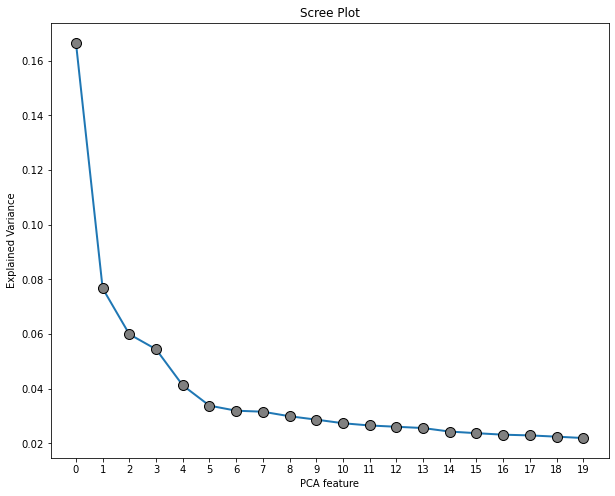

In [37]:
# Visulization of scree plot
scree_plot(pca_object = pca_psy,
          export = False)

The scree plot was recreated with the four components selected to visualize its exact trend.

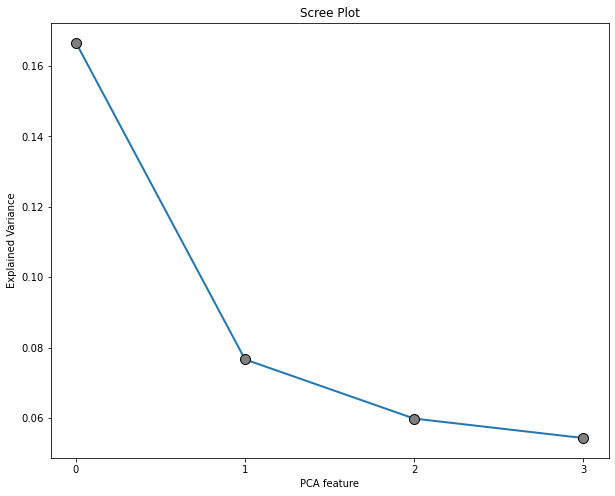

In [38]:
# Selection of most relevant factors
psy_factors_4 = PCA(n_components = 4,
                  random_state = 219)

psy_fact = psy_factors_4.fit_transform(app_psy_df)

scree_plot(pca_object = psy_factors_4,
           export = False)

The same analysis was repeated for behavioral questions. In order to provide a complete spectrum of our possible clients it was necessary to analyze behavioral factors separately from psychometric.

In [39]:
# Creation of list psychometric questions
psy_list = ['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5','q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12',
            'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8','q25r9', 'q25r10', 'q25r11', 'q25r12', 
            'q26r18', 'q26r3', 'q26r4','q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11',
            'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']
# Dropping psychometric questions
app_bhv = app_princ.drop(psy_list, axis = 1)

In [40]:
# Scaling new dataframe for behavioural variables
bhv_def = scaler(df = app_bhv)

PCA analysis proceeds as before. Initially all PCA were selected, to identify 80% of variance. In this case, 21 Principal Components were necessary to explain this amount of variance in the population. 

In [71]:
pca_bhv = PCA(n_components = 21,
             random_state = 219)

app_bhv = pca_bhv.fit_transform(bhv_def)

In [72]:
bhv_factors = 0
cumulated_variance = 0

for variance in pca_bhv.explained_variance_ratio_:
    
    bhv_factors += 1
    cumulated_variance += variance
    
    print(f"""
    {bhv_factors} 
    {variance.round(3)}
    {cumulated_variance.round(3)}""")


    1 
    0.168
    0.168

    2 
    0.082
    0.25

    3 
    0.056
    0.306

    4 
    0.046
    0.352

    5 
    0.039
    0.391

    6 
    0.036
    0.427

    7 
    0.036
    0.463

    8 
    0.033
    0.496

    9 
    0.03
    0.526

    10 
    0.028
    0.554

    11 
    0.028
    0.581

    12 
    0.027
    0.608

    13 
    0.026
    0.634

    14 
    0.024
    0.658

    15 
    0.023
    0.681

    16 
    0.022
    0.704

    17 
    0.022
    0.725

    18 
    0.021
    0.747

    19 
    0.02
    0.767

    20 
    0.02
    0.787

    21 
    0.019
    0.806


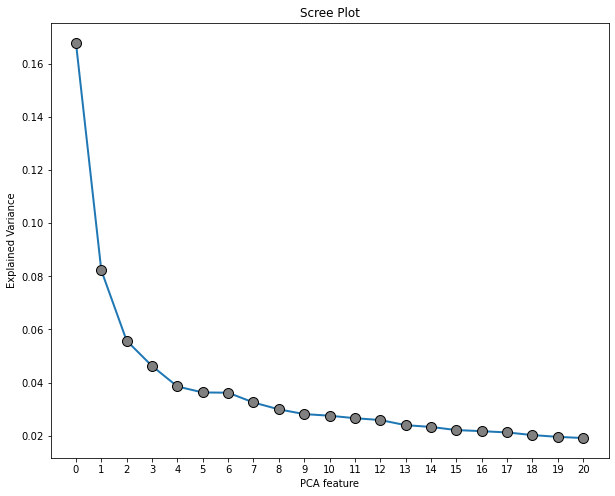

In [73]:
scree_plot(pca_object = pca_bhv,
           export = False)

The decline of the curve can be identified between the third and fourth component.

We decided to select the first four components to maintain a consistency in the analysis started in the previous passage.

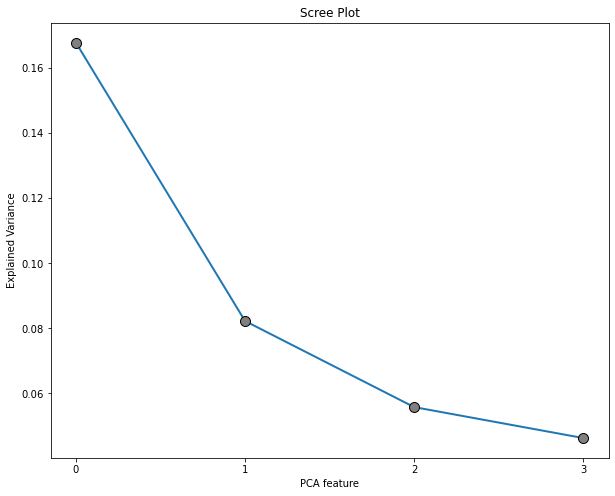

In [44]:
bhv_factors_4 = PCA(n_components = 4,
                  random_state = 219)

bhv_fact = bhv_factors_4.fit_transform(bhv_def)

scree_plot(pca_object = bhv_factors_4,
           export = False)

In [45]:
# Creation dataframe for most relevant psychometric factors
psy_factors = pd.DataFrame(np.transpose(psy_factors_4.components_.round(3)))

psy_factors = psy_factors.set_index(app_psy_df.columns)

After the identification of the unknown components, it began the analysis of personalities present in the population. 

This analysis considered the relevant correlations between the components and the questions provided in the survey. The most correlated questions were considered in light of the type of correlation, positive or negative. Consequently, it was established the type of persona identified.

In [46]:
# Renaming columns for personas (after Excel analysis)
psy_factors.columns = ['Tech leader',
                      'Tech neofit',
                      'Tech millennial',
                      'Tech isolated']
psy_factors.round(3)

,Tech leader,Tech neofit,Tech millennial,Tech isolated
q24r1,-0.125,-0.021,-0.090,0.072
q24r2,0.011,0.058,0.291,0.127
q24r3,-0.020,0.119,0.193,0.251
q24r5,-0.027,0.066,-0.041,0.248
q24r6,0.006,0.019,0.235,0.101
q24r7,0.074,0.059,0.086,0.069
no_tech,-0.454,-0.131,-0.319,-0.463
tech_link,0.826,-0.146,-0.180,-0.349
q25r1,0.031,-0.040,-0.051,0.033
q25r2,0.029,0.001,-0.026,0.144


In [47]:
# Creation dataframe for personas
bhv_factors = pd.DataFrame(np.transpose(bhv_factors_4.components_.round(3)))

bhv_factors = bhv_factors.set_index(bhv_def.columns)

#psy_factors.to_excel('psy_factors.xlsx')

The same process for the identification of personas was conduced on the behavioral questions. The type of personalities were nominated in a different way due to the characteristics identified by these questions.

In [59]:
bhv_factors.columns = ['Self confident',
                      'Explorer',
                      'New style',
                      'Old style']

bhv_factors.round(3)

,Self confident,Explorer,New style,Old style
0,0.066,-0.287,0.382,-0.216
1,0.150,-0.059,0.151,0.202
2,0.028,0.056,-0.384,0.268
3,0.112,0.165,0.035,0.207
4,0.126,0.134,0.124,0.371
5,0.120,0.143,0.124,0.399
6,0.122,0.099,0.118,0.409
7,0.155,-0.127,0.196,0.144
8,-0.024,0.108,-0.017,-0.020
9,0.000,-0.000,-0.000,-0.000


Finally, it was necessary to understand what determines the type of personality.

The factors at the base of personas are nominated factor loadings. These elements help to identify what are the fundamentals of every type of client. In other words, what brings a person to shape its preferences is described from the factor loading, which will determine the marketing strategy. 

In [60]:
# Factor loading for psychometric variables
factor_loading_psy = psy_factors_4.transform(app_psy_df)

factor_loading_psy = pd.DataFrame(factor_loading_psy)
factor_loading_psy.columns = ['Tech leader', 'Tech neofit', 'Tech millennial', 'Tech isolated']

factor_loading_psy.head(n = 5)

,Tech leader,Tech neofit,Tech millennial,Tech isolated
0,-3.011103,-0.999453,-1.439016,3.317818
1,5.845122,2.487120,1.406567,0.737484
2,4.492567,-2.461412,-2.146775,1.560203
3,6.086227,-4.112588,-2.863579,-0.280764
4,-0.462798,1.850452,1.442479,2.300779


In [61]:
# Factor loading for behavioral variables
factor_loading_bhv = bhv_factors_4.transform(bhv_def)

factor_loading_bhv = pd.DataFrame(factor_loading_bhv)
factor_loading_bhv.columns = bhv_factors.columns

factor_loading_bhv.head(n = 5)

,Self confident,Explorer,New style,Old style
0,-3.894162,1.847650,0.067880,0.803996
1,2.681892,2.763945,-0.184346,-1.428235
2,-2.123592,1.888522,-0.868179,1.763045
3,-1.793584,0.565750,1.347856,0.249675
4,0.030777,1.962695,1.097646,-2.803869


In [62]:
# Unique dataframe for psychometric and behavioral variables
spectrum = pd.concat([factor_loading_psy, factor_loading_bhv], axis = 1)
spectrum

,Tech leader,Tech neofit,Tech millennial,Tech isolated,Self confident,Explorer,New style,Old style
0,-3.011103,-0.999453,-1.439016,3.317818,-3.894162,1.847650,0.067880,0.803996
1,5.845122,2.487120,1.406567,0.737484,2.681892,2.763945,-0.184346,-1.428235
2,4.492567,-2.461412,-2.146775,1.560203,-2.123592,1.888522,-0.868179,1.763045
3,6.086227,-4.112588,-2.863579,-0.280764,-1.793584,0.565750,1.347856,0.249675
4,-0.462798,1.850452,1.442479,2.300779,0.030777,1.962695,1.097646,-2.803869
...,...,...,...,...,...,...,...,...
1547,0.362166,0.424508,0.528299,-1.921562,1.497872,-1.202264,0.305884,-0.320596
1548,-3.063393,-0.487321,1.139427,-1.144247,-0.304240,-2.968826,1.286010,0.553462
1549,1.033771,0.904904,1.993533,-1.345708,6.064859,-0.285485,1.314897,-0.696752
1550,-2.155461,-2.871404,1.055671,-1.789445,0.536755,-2.258192,-1.126440,-0.140092


In [52]:
# Scaling new dataframe
spectrum_df = scaler(df = spectrum)

# Cluster analysis

The final part of the analysis is constituted by the analysis of clusters.

After having identified the type of personalities present in the population, it was necessary to divide them into groups to identify purchasing behaviors. Moreover, the final passage of exploration of demographic questions made possible to understand how homogeneous were the groups identified as clusters.

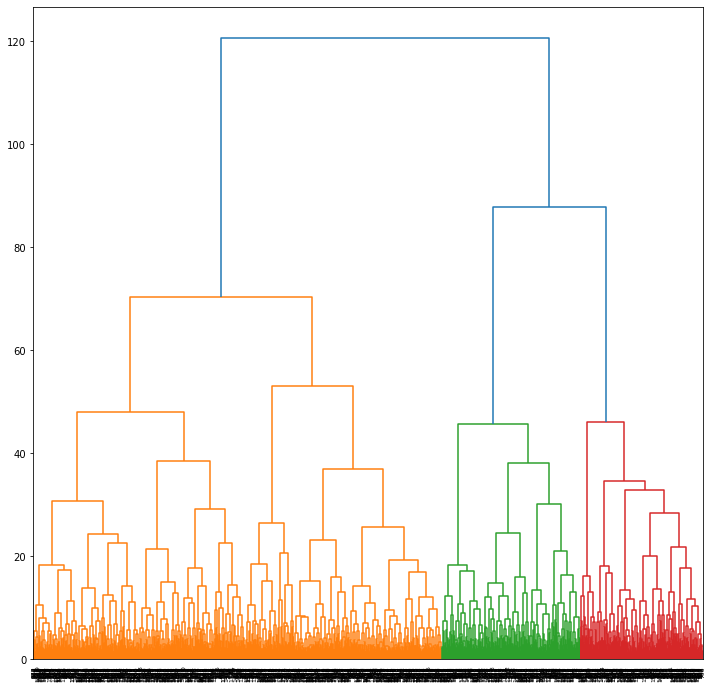

In [53]:
# Visualization of dendrogram for cluster analysis
cluster_fin = linkage(y = spectrum,
                     method = 'ward',
                     optimal_ordering = False)

fig, ax = plt.subplots(figsize=(12, 12))

dendrogram(Z = cluster_fin,
         leaf_rotation = 90,
         leaf_font_size = 6)

plt.show()

The selection of three clusters was due to a simulation made on the dendrogram with a horizontal threshold. 

After having identified the point in which the population starts to be better defined from clusters, we decided to maintain three of them for the conclusion of our analysis.

In [66]:
# Instantiation KMeans algorithm
k_fin = KMeans(n_clusters = 3,
              random_state = 219)
# Fitting algortihm on factors
k_fin.fit(spectrum)
# Creation of dataframe for clusters
fin_clu = pd.DataFrame({'Cluster': k_fin.labels_})
print(fin_clu.iloc[ : , 0].value_counts())

1    836
2    434
0    282
Name: Cluster, dtype: int64


In [67]:
# Creation of centroids for clusters
centroids = k_fin.cluster_centers_

# Creating dataframe for centroids
centroids_df = pd.DataFrame(centroids)

# Renaming as columns personas
centroids_df.columns = ['Tech leader', 
                        'Tech neofit',
                        'Tech millennial',
                        'Tech isolated',
                        'Self confident',
                        'Explorer',
                        'New style',
                         'Old style']

centroids_df.round(2)

,Tech leader,Tech neofit,Tech millennial,Tech isolated,Self confident,Explorer,New style,Old style
0,1.37,0.30,1.38,-0.10,3.51,1.13,0.15,-0.05
1,-1.90,-0.03,-0.18,-0.00,-0.32,-0.70,-0.02,-0.06
2,2.76,-0.14,-0.54,0.07,-1.66,0.61,-0.06,0.14


Finally were retaken the demographic questions initially dropped.

Those questions are useful to identify the amount of people comprehended in every demographic group. The composition of segments of population for the marketing strategy is established consequently.

In [68]:
# Creation separate dataframe demographic variables
app_dem = pd.concat([app.loc[ : , 'q1'], app.loc[ : , 'q48':'q57']], axis = 1)

In [69]:
# Final concatenation cluster, pca, demographic
cluster_df = pd.concat([spectrum, app_dem],
                      axis = 1)

cluster_df.head(n = 10)

,Tech leader,Tech neofit,Tech millennial,Tech isolated,Self confident,Explorer,New style,Old style,q1,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,-3.011103,-0.999453,-1.439016,3.317818,-3.894162,1.847650,0.067880,0.803996,10,3,4,1,0,0,0,0,2,2,5,1
1,5.845122,2.487120,1.406567,0.737484,2.681892,2.763945,-0.184346,-1.428235,5,5,1,0,1,1,0,0,3,2,10,2
2,4.492567,-2.461412,-2.146775,1.560203,-2.123592,1.888522,-0.868179,1.763045,7,4,4,0,0,0,1,0,2,2,6,1
3,6.086227,-4.112588,-2.863579,-0.280764,-1.793584,0.565750,1.347856,0.249675,7,2,1,0,1,1,0,0,1,2,5,1
4,-0.462798,1.850452,1.442479,2.300779,0.030777,1.962695,1.097646,-2.803869,2,5,2,1,0,0,0,0,3,2,4,2
5,-0.277581,3.582619,0.316450,0.725669,-4.681925,5.217621,2.579749,0.903085,9,4,4,0,0,0,1,1,1,2,8,1
6,-3.871704,-1.769187,0.433910,0.430292,0.495673,-1.605508,0.271125,-0.441915,11,3,1,0,0,0,0,1,1,2,8,2
7,-2.320206,0.948855,-2.125653,-0.562498,-2.278252,1.311529,0.354954,0.573437,6,4,1,0,0,0,1,1,1,2,11,2
8,-3.212949,0.840904,-0.050035,0.297018,-1.381782,-1.317944,-0.891300,0.916286,6,6,2,1,0,0,0,0,1,2,10,1
9,0.116030,3.238469,-1.539237,-0.190409,-3.503462,0.362394,-0.206678,1.410426,10,5,2,1,0,0,0,0,1,2,9,2


In [70]:
# Renaming channels for final strategy
# Demographic variable age
age_channels = {1: 'under_18',
                2: '18-24',
                3: '25-29',
                4: '30-34',
                5: '35-39',
                6: '40-44',
                7: '45-49',
                8: '50-54',
                9: '55-59',
                10: '60-64',
                11: '65-over'}

cluster_df['q1'].replace(age_channels, inplace = True)

# Demographic variable education
education_level={1: 'High_school',
                 2: 'High_school_graduate',
                 3: 'Some college',
                 4: 'College_graduate',
                 5: 'Some post grad studies',
                 6: 'Post graduate degree'}

cluster_df['q48'].replace(education_level, inplace = True)

# Demographic variable for marital status
marital_status={1: 'Married',
                2:  'Single',
                3:  'Single with partner',
                4:  'Separated,widowed,divorced'}

cluster_df['q49'].replace(marital_status, inplace = True)

# Demographic variables race
race={1: 'White',
      2: 'Black',
      3: 'Asian',
      4: 'Native hawaian',
      5: 'American indian',
      6: 'Other race'}

cluster_df['q54'].replace(race, inplace = True)

# Demographic variables etnicity
etnicity={1: 'Yes',
          2: 'No'}

cluster_df['q55'].replace(etnicity, inplace=True)

# Demographic variable wage
wage={1: 'Under 10000',
      2: '10000-14999',
      3: '15000-19999',
      4: '20000-29999',
      5: '30000-39999',
      6: '40000-49999',
      7: '50000-59999',
      8: '60000-69999',
      9: '70000-79999',
      10: '80000-89999',
      11: '90000-99999',
      12: '100000-124999',
      13: '125000-149999',
      14: '150000+'}
        
cluster_df['q56'].replace(wage, inplace = True)

# Demographic variable gender
gender={1: 'Male',
        2: 'Female'}

cluster_df['q57'].replace(gender, inplace=True)

A cross-evaluation between personas, PCA, and demographic questions brought us to obtain these descriptions of the clusters.

Cluster 0: Online lifestyle. A person who appreciates technology and every new product proposed by the industry. Connection            is not limited to exigencies of school or work, but constitutes the everyday life of this person. Due to the                fact that it covers age channel until 50, it is a very expanded market segment. The variability of wage between            youngsters and middle age people has to be considered, but in the light of the fact that the client uses to be              favourable to purchases.
           Ideal type of client.

Cluster 1: Offline lifestyle. A person who is very careful in its approach to technology, avoiding to express opinions or              relevant judgements. The client does not consider itself confident to technological themes, augmenting its                  reluctance to every type of purchasing. Probably a middle aged person, may become more tech friendly with ad hoc            products and marketing campaigns.
           Possible minoritarian segment.
           
Cluster 2: Professional lifestyle. A person who is open to technological purchases, but in relation to its necessity for              the job. The client is in working age, between 30 - 49 years old and due to the success is having, as                      testimonied from its salary requires quality products to increase its performance. Consequently, only a portion            of products matches its requests, avoiding an open-for-all strategy of purchase. Few expensive products is what            this client wants.
           High level client.